# LipGAN

This notebook uses [LipGAN](https://dl.acm.org/doi/10.1145/3343031.3351066) from the open source project [Rudrabha/LipGAN](https://github.com/Rudrabha/LipGAN) to generate lip motion.

For other deep-learning Colab notebooks, visit [tugstugi/dl-colab-notebooks](https://github.com/tugstugi/dl-colab-notebooks).


## Install Rudrabha/LipGAN

In [1]:
#@title
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/Rudrabha/LipGAN.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # clone and install dependencies
  !git clone -q --depth 1 -b fully_pythonic {git_repo_url}
  !pip install -q gdown youtube-dl
  !pip install -q git+https://www.github.com/keras-team/keras-contrib.git

import sys
sys.path.append(project_name)
import matplotlib.pyplot as plt
from IPython.display import Audio

     |████████████████████████████████| 1.8MB 8.8MB/s 


## Download pretrained weights

In [2]:
pretrained_checkpoint = 'LipGAN/logs/lipgan_residual_mel.h5'
if not exists(pretrained_checkpoint):
  !cd LipGAN/logs && gdown https://drive.google.com/uc?id=1DtXY5Ei_V6QjrLwfe7YDrmbSCDu6iru1
  !cd LipGAN/logs && wget -q http://dlib.net/files/mmod_human_face_detector.dat.bz2
  !cd LipGAN/logs && bzip2 -d mmod_human_face_detector.dat.bz2
  !ls LipGAN/logs

Downloading...
From: https://drive.google.com/uc?id=1DtXY5Ei_V6QjrLwfe7YDrmbSCDu6iru1
To: /content/LipGAN/logs/lipgan_residual_mel.h5
199MB [00:04, 49.5MB/s]
gen_faces  lipgan_residual_mel.h5  mmod_human_face_detector.dat  README.md


## Generate Talking Face from Image and Audio

We are going to generate video from the following image

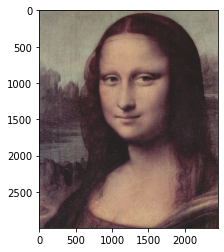

In [3]:
IMAGE_URL = 'http://images.zeno.org/Kunstwerke/I/big/1300044a.jpg'
image_name = basename(IMAGE_URL)

!wget -q {IMAGE_URL}
plt.imshow(plt.imread(image_name))

and from the following audio:

In [4]:
AUDIO_URL = 'https://keithito.com/LJ-Speech-Dataset/LJ037-0171.wav'
audio_name = basename(AUDIO_URL)

!wget -q {AUDIO_URL}
Audio(audio_name)

Now generate the talking face video:

In [0]:
#@title
!rm -rf *.avi
!cd {project_name} && python batch_inference.py --checkpoint_path logs/lipgan_residual_mel.h5 --face ../{image_name} --fps 30 --audio ../{audio_name} --results_dir ..

## Show Result

In [6]:
#@title
!ffmpeg -y -loglevel panic -i result_voice.avi output.mp4

def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

show_local_mp4_video('output.mp4', width=960, height=720)